# Charge on a wire
This example is based on the book by Walton Gibson. It aims to make a simple analytical solver for current on a wire by the method of moments. This ends up being pretty simple and just requries us to build a matrix then solve it using something like scipy's conjugate gradient solver. 

In [4]:
import numpy as np
from scipy.sparse.linalg import cg as conjgradsolve
import matplotlib.pyplot as plt

In [2]:
def charged_wire_1d():
    
    def build_matrix(n,dx,a=0):
        output = []
        #output.append(0)
        for i in range(1,n):
            xb = (n+1)*dx
            xa = (n+1-1)*dx
            xm = i*dx #this is my current issue?
            
            top = (xb - xm) + np.sqrt((xb-xm)**2-a**2)
            bottom = (xa - xm) + np.sqrt((xa-xm)**2-a**2)
            z = np.log(top / bottom)
            output.append(z)
        
        #output = output[int(n/2):-1] + output[int(n/2):-1] 
        # only need to build the first row then copy N times
        # row = [z1, z2 ... ZN][zn, z1, z2 ...zn-1]
        #output.append(0)
        
        out_matrix = []
        
        for j in range(len(output)):
            out_matrix.append(output)
            output = [output[-1]] + output[0:-1] 

        out_matrix = np.array(out_matrix)
        return out_matrix
        
        
    bm = 1#4*np.pi#*8.854e-12 # normalise
    n = 1501
    dx = 1/(n+1)
    
    a_matrix = build_matrix(n,dx)
    b_matrix = [bm for x in a_matrix]
    
    b_matrix[-1] = 0 # boundary conditions zero field on ends
    b_matrix[0] = 0 # perhaps these are artificial and the issue is in the matirx
    solution = conjgradsolve(a_matrix,b_matrix, tol=1e-9)
    
    plt.plot(abs(solution[0]*8.854e-12*4*np.pi))
    plt.show()

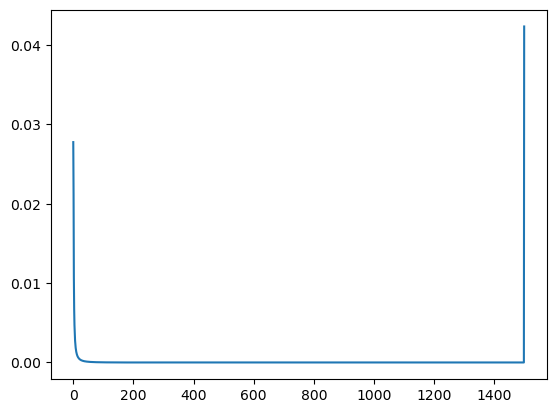

In [5]:
charged_wire_1d()

This looks almost like what I expect excect the right hand side is no symetric. At the moment I am unsure of why this would be the case. I am guessing it must be because of the Xm value which is not talked about too much in the book. I am thinking this is the length along the wire but can't figure out why this solution is not correct. 